In [23]:
import tensorcircuit as tc
import tensorflow as ts 
import numpy as np
import math
from numpy import linalg as LA
from matplotlib import pyplot as plt
K = tc.set_backend("tensorflow")
tc.set_dtype("complex128")
sim_t = math.pi
interval = 100
dt = sim_t / interval
cur_t = 0 
h_m = 0.5

qubit = 5
min_w = 999
w=0
v=0
I = tc.gates._i_matrix
X = tc.gates._x_matrix  
Y = tc.gates._y_matrix  
Z = tc.gates._z_matrix




In [24]:
def i_iterate_multiplication(u):
    tmp = 1
    for i in range(u):
        tmp = np.kron(I, tmp)
    return tmp

def zzi(i):
     return np.kron(np.kron(i_iterate_multiplication(i), np.kron(Z, Z)), i_iterate_multiplication(qubit-2-i))
    
def xi(i):
    return np.kron(np.kron(i_iterate_multiplication(i), X), i_iterate_multiplication(qubit-1-i))

h_Z = 0
h_X = 0
for i in range(qubit-1):
    h_Z = h_Z - zzi(i)
for i in range(qubit):
    h_X = h_X + h_m * xi(i)
def evolution(h, t):
    return tc.gates.exponential_gate(h, t)
w, v = LA.eig(h_X+h_Z)
for i in range(0, len(w)):
        if w[i] < min_w:
            min_w = w[i]
            
c_precise=tc.Circuit(qubit)
c_precise.any(*range(qubit), unitary=evolution(h_X+h_Z, sim_t))
#print(c_precise.state())
        
def error(num):
    dt0 = sim_t / num
    c_trotter=tc.Circuit(qubit)
    cur_t=0
    for _interval in range(num):
        c_trotter.any(*range(qubit), unitary=evolution(h_X, dt0))
        c_trotter.any(*range(qubit), unitary=evolution(h_Z, dt0))
        cur_t += dt0
    return c_trotter.state()-c_precise.state()

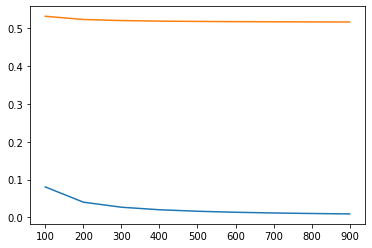

In [28]:
theta_list = np.arange(100, 1000, 100)
plt.plot(theta_list, [K.real(error(theta))[0].numpy()*(theta) for theta in theta_list])
plt.plot(theta_list, [K.real(error(theta))[1].numpy()*(-theta) for theta in theta_list])
plt.show()

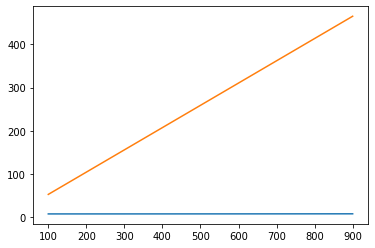

In [29]:
theta_list = np.arange(100, 1000, 100)
plt.plot(theta_list, [K.real(error(theta))[0].numpy()*(theta*theta) for theta in theta_list])
plt.plot(theta_list, [K.real(error(theta))[1].numpy()*(-theta*theta) for theta in theta_list])
plt.show()